# <font color=#4267b2>Q9-1 CNN</font>
## <font color=#4267b2>設定及匯入需要的套件</font>

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from ipywidgets import interact_manual
from keras.utils import np_utils, plot_model 
from keras.models import Sequential, Model
from keras.utils.vis_utils import model_to_dot
from keras.layers import Dense, Activation, Input, concatenate, Flatten
from keras.optimizers import Nadam,SGD
from keras.layers import Conv2D, MaxPool2D

Using TensorFlow backend.


## <font color=#4267b2>處理資料</font>
### <font color=#4267b2>讀入MNIST檔案</font>

In [3]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

### <font color=#4267b2> x 正規化至0~1之間</font>
### <font color=#4267b2> y 做one-hot處理</font>

In [4]:
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)
x_train = x_train0/255
x_test = x_test0/255
x_train_re = x_train.reshape(60000, 28,28,1)
x_test_re = x_test.reshape(10000, 28,28,1)

### <font color=#4267b2> 看看手寫文字長相</font>

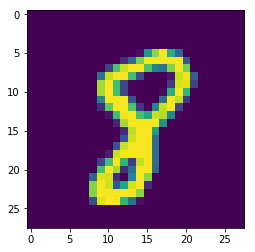

In [5]:
X=x_train[94].reshape(28,28)
plt.imshow(X)

## <font color=#4267b2> 使用Function API 設計自己的CNN網路</font> 
### <font color=#4267b2> 根據之前的結果普遍用'selu'、'relu'有不錯的結果</font>

In [6]:
x = Input(shape=(28,28,1))
f_1=Conv2D(3,(5,5), padding='same',activation='relu')
pool_1 = MaxPool2D(pool_size=(2, 2))
f_2=Conv2D(6,(5,5), padding='same',activation='relu')
pool_2 = MaxPool2D(pool_size=(2, 2))
f_3=Conv2D(12,(5,5), padding='same',activation='selu')
pool_3 = MaxPool2D(pool_size=(2, 2))
f_4=Dense(10, activation='softmax')

### <font color=#4267b2>看看輸入 x</font>

In [7]:
print(x)

Tensor("input_1:0", shape=(?, 28, 28, 1), dtype=float32)


### <font color=#4267b2> Function API</font>

In [8]:
h_1=pool_1(f_1(x))
h_2=pool_2(f_2(h_1))
h_3=Flatten()(pool_3(f_3(h_2)))
y=f_4(h_3)

### <font color=#4267b2> 產生模型</font>

In [9]:
model=Model(x,y)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 3)         78        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 6)         456       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 6)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 12)          1812      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 12)          0         
__________

## <font color=#4267b2>比較兩種方式畫出流程圖</font>
### <font color=#4267b2>1. 利用pydot畫出流程圖</font>
#### <font color=#4267b2>並且把字體、背景調整</font>

In [122]:
model_dot_str = model_to_dot(model,show_shapes=True,show_layer_names=True).to_string()
index = model_dot_str.find('rankdir=TB;\n')
size_str = 'size="20";\n'
graph_str = 'graph [fontname = "helvetica"];\n'
node_str = 'node [fontname = "helvetica",shape = "Mrecord",style=filled, fillcolor="skyblue"];\n'
edge_str = 'edge [fontname = "helvetica",shape ="Mrecord", color="darkgreen"];'
modified_dot_data = model_dot_str[:index+len('rankdir=TB;\n')] + \
                    size_str + \
                    node_str + \
                    node_str + \
                    edge_str + \
                    model_dot_str[index:]

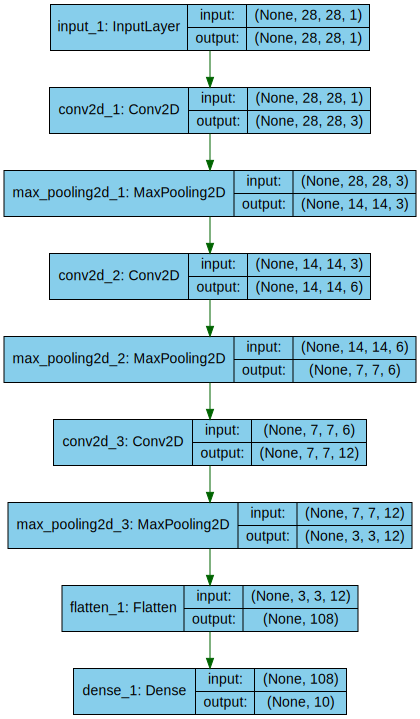

In [123]:
from graphviz import Source
src = Source(modified_dot_data)
#print(model_dot_str,modified_dot_data)
src

### <font color=#4267b2> 此處參考之前的參數，略微調高學習率至0.01</font>

In [71]:
optimizer_Na = Nadam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
model.compile(optimizer= optimizer_Na, loss='categorical_crossentropy', metrics=['acc'])

In [72]:
model.fit(x_train_re,y_train,batch_size=1000, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 26s 436us/step - loss: 0.5616 - acc: 0.8212
Epoch 2/10
60000/60000 [==============================] - 26s 434us/step - loss: 0.2890 - acc: 0.9230
Epoch 3/10
60000/60000 [==============================] - 26s 435us/step - loss: 0.1223 - acc: 0.9627
Epoch 4/10
60000/60000 [==============================] - 26s 434us/step - loss: 0.0870 - acc: 0.9729
Epoch 5/10
60000/60000 [==============================] - 26s 435us/step - loss: 0.0730 - acc: 0.9773
Epoch 6/10
60000/60000 [==============================] - 26s 437us/step - loss: 0.0635 - acc: 0.9803
Epoch 7/10
60000/60000 [==============================] - 27s 447us/step - loss: 0.0575 - acc: 0.9820
Epoch 8/10
60000/60000 [==============================] - 26s 438us/step - loss: 0.0522 - acc: 0.9837
Epoch 9/10
60000/60000 [==============================] - 26s 436us/step - loss: 0.0468 - acc: 0.9855
Epoch 10/10
60000/60000 [==============================] - 26s 436us/step - loss: 

## <font color=#4267b2> 最終結果</font>

In [74]:
score = model.evaluate(x_test_re,y_test)
score[1]

10000/10000 [==============================] - 4s 374us/step


0.9854

In [75]:
print('測試資料的 loss: %f'%(score[0]))
print('測試資料的正確率: %f'%(score[1]))

測試資料的 loss: 0.044471
測試資料的正確率: 0.985400


In [82]:
model.save('20190510_Q9-1_model_weights.h5')

## <font color=#4267b2> 小結</font>
<font color=#4267b2>做完之後發現計算速度並沒有比之前全連結層還要快，不過相對之前神經元很少的作業準確率有更靠近100%。  
再對比同學們的運算速度，感覺我的每個step都有慢一些，可能是電腦CPU的關係
</font>